# Session Summary Tags

data exported from https://conviva.cloud.databricks.com/#notebook/6850744/command/6850841

In [1]:
import pandas as pd

from ast import literal_eval
import ast

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ss_csv = pd.read_csv('./data3/ss-tnt-export-2019-11-01.csv')
ss_csv.head(5)

,ci_channel,ci_asset,ci_affiliate,ci_contentType,ci_series,ci_genre,ci_seriesTitleId,ci_videoTitleId,isLive
0,TNT,movies - The House,Charter+Spectrum++,movie,movies,entertainment,NaN,2079003,F
1,TNT,Red,AT%26T+U-verse++,movie,movies,entertainment,NaN,774021,F
2,NaN,Gangster Squad,NaN,NaN,NaN,NaN,NaN,NaN,F
3,TNT,The Alienist - S1:E4 - These Bloody Thoughts,AT%26T+U-verse++,episode,The+Alienist,entertainment,2066250,2066254,F
4,TNT,Jack Reacher: Never Go Back,Verizon+Fios++,movie,NaN,entertainment,NaN,2167031,F


### drop affiliate duplications

In [3]:
ss_tags = ss_csv.drop(['ci_affiliate'], axis = 1).drop_duplicates()
ss_tags.head(5)

,ci_channel,ci_asset,ci_contentType,ci_series,ci_genre,ci_seriesTitleId,ci_videoTitleId,isLive
0,TNT,movies - The House,movie,movies,entertainment,NaN,2079003,F
1,TNT,Red,movie,movies,entertainment,NaN,774021,F
2,NaN,Gangster Squad,NaN,NaN,NaN,NaN,NaN,F
3,TNT,The Alienist - S1:E4 - These Bloody Thoughts,episode,The+Alienist,entertainment,2066250,2066254,F
4,TNT,Jack Reacher: Never Go Back,movie,NaN,entertainment,NaN,2167031,F


In [4]:
100 * ss_tags.count() / ss_tags.shape[0]

ci_channel          67.911480
ci_asset            99.861687
ci_contentType      67.704011
ci_series           61.410788
ci_genre            67.911480
ci_seriesTitleId    47.095436
ci_videoTitleId     63.070539
isLive              99.861687
dtype: float64

In [5]:
ss_tags.shape

(1446, 8)

# CMS tags

In [6]:
import pandas as pd
cms_json = pd.read_json('./data3/baikal-tnt-cms-dev-export-2019-11-01.json', lines=True)
cms_json.head(5)

,headers,id,metadata,statusCode
0,"{'date': 'Wed, 18 Dec 2019 05:30:30 GMT', 'con...",440820,"[{'_id': '5d709245b8d1840b3cc0efe7', 'TitleId'...",200
1,"{'date': 'Wed, 18 Dec 2019 05:17:19 GMT', 'con...",2063894,"[{'_id': '5d70a28bb8d1840b3cc6df9c', 'TitleId'...",200
2,"{'date': 'Wed, 18 Dec 2019 05:23:50 GMT', 'con...",22605,[],200
3,"{'date': 'Wed, 18 Dec 2019 05:30:28 GMT', 'con...",2117628,"[{'_id': '5daf558db8d184177ced2336', 'TitleId'...",200
4,"{'date': 'Wed, 18 Dec 2019 05:30:33 GMT', 'con...",17569,[],200


In [7]:
from pandas.io.json import json_normalize
import json

In [8]:
def parsedf(df):
    parsed_df = pd.concat([json_normalize(js[0]) for js in df['metadata'] if len(js)>0])
    return parsed_df

In [9]:
cms_df = parsedf(cms_json)
cms_df.head(5)

,AiringSequenceNumber,AnimationMode.AnimationModeId,AnimationMode.Name,Awards,AwayTeam.ExternalId,AwayTeam.Name,AwayTeam.SportTeamId,AwayTeam.Tricode,AwayTeamDivision.LeagueDivisionId,AwayTeamDivision.Name,...,TcmLength,TcmStars,TcmStoryline,TitleId,TitleName,TitleNameSortable,TitleType.Name,TitleType.TitleTypeCode,TitleType.TitleTypeId,_id
0,107.0,1,Non-Animated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,440820,Nymphs Just Want to Have Fun,Nymphs Just Want to Have Fun,Episode,E,6,5d709245b8d1840b3cc0efe7
0,6.0,1,Non-Animated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2063894,Something Wicked This Way Comes.,Something Wicked This Way Comes.,Episode,E,6,5d70a28bb8d1840b3cc6df9c
0,NaN,1,Non-Animated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2117628,It,It,Feature Film,FF,1,5daf558db8d184177ced2336
0,NaN,1,Non-Animated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2207419,NBA GameTime 2/24,NBA GameTime 2/24,Episode,E,6,5df8776bb8d1841010e7d107
0,152.0,1,Non-Animated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2001718,Heartache,Heartache,Episode,E,6,5d709ff5b8d1840b3cc6253f


In [10]:
cms_df.columns

Index(['AiringSequenceNumber', 'AnimationMode.AnimationModeId',
       'AnimationMode.Name', 'Awards', 'AwayTeam.ExternalId', 'AwayTeam.Name',
       'AwayTeam.SportTeamId', 'AwayTeam.Tricode',
       'AwayTeamDivision.LeagueDivisionId', 'AwayTeamDivision.Name',
       'EventDatetimeUTC', 'ExternalSeriesItemNumber', 'ExternalSources',
       'Genres', 'HomeTeam.ExternalId', 'HomeTeam.Name',
       'HomeTeam.SportTeamId', 'HomeTeam.Tricode',
       'HomeTeamDivision.LeagueDivisionId', 'HomeTeamDivision.Name',
       'InternationalReferenceNumber', 'KeyGenres', 'Keywords',
       'Language.LanguageId', 'Language.Name', 'LengthInSeconds',
       'NeedsCopyrightProtection', 'NetworkLevels', 'OriginalNetwork.Name',
       'OriginalNetwork.NetworkCode', 'OriginalNetwork.NetworkId',
       'OtherNames', 'Participants', 'PerformanceMode.Name',
       'PerformanceMode.PerformanceModeId', 'ProcessedDatetimeUTC',
       'ProductionNumber', 'Properties', 'Ratings', 'RelatedTitles',
       'Release

In [11]:
cms_tags = cms_df[[
    'SeriesTitleId', # cmsID
    'TitleId', #cmsID
    'SeriesTitleName', # series name
    'SeasonNumber', # season number
    'SeasonEpisodeNumber', # episode number
    'ExternalSeriesItemNumber',
    'TitleName', # episode name
    'LengthInSeconds', # content length
    'NetworkLevels', #channel
    'TitleType.Name', #content category
    'Genres', #genre list
    'Storylines', #discription
    'Keywords', #key words
    'Language.Name' # language name
    #series image url
    #episode image url
   ]]
cms_tags.head(5)

,SeriesTitleId,TitleId,SeriesTitleName,SeasonNumber,SeasonEpisodeNumber,ExternalSeriesItemNumber,TitleName,LengthInSeconds,NetworkLevels,TitleType.Name,Genres,Storylines,Keywords,Language.Name
0,343094.0,440820,Charmed,5.0,19,S5:E19,Nymphs Just Want to Have Fun,0.0,"[{'Name': 'TNT', 'NetworkId': 15}, {'Name': 'W...",Episode,"[{'Name': 'Drama', 'GenreId': 5}, {'Name': 'Fa...","[{'Type': 'Short (240 Characters)', 'Language'...",[],ENGLISH
0,2063888.0,2063894,Will,1.0,6,S1:E06,Something Wicked This Way Comes.,NaN,"[{'Name': 'TNT', 'NetworkId': 15}]",Episode,"[{'Name': 'Drama', 'GenreId': 5}]","[{'Type': 'Short (240 Characters)', 'Language'...",[],ENGLISH
0,NaN,2117628,NaN,NaN,NaN,NaN,It,8100.0,"[{'Name': 'CTN', 'NetworkId': 7}, {'Name': 'TB...",Feature Film,"[{'Name': 'Adaptation', 'GenreId': 1770}, {'Na...","[{'Type': 'Baseline', 'Language': 'ENGLISH', '...","[{'Name': 'Balloons (Novelties)', 'KeywordId':...",ENGLISH
0,2205134.0,2207419,NBA GameTime 2020,1.0,NaN,NaN,NBA GameTime 2/24,NaN,[],Episode,"[{'Name': 'Sports', 'GenreId': 85}]","[{'Type': 'Short (240 Characters)', 'Language'...",[],ENGLISH
0,697063.0,2001718,Supernatural,8.0,3,S8:E03,Heartache,0.0,"[{'Name': 'CTN', 'NetworkId': 7}, {'Name': 'TB...",Episode,"[{'Name': 'Drama', 'GenreId': 5}, {'Name': 'Fa...","[{'Type': 'Short (240 Characters)', 'Language'...",[],ENGLISH


# Clean Data

### 1. drop rows with empty id

In [12]:
ss = ss_tags.dropna(subset=['ci_videoTitleId'])
cms = cms_tags.dropna(subset=['TitleId'])

### 2. convert CMS ID type from int to str

In [13]:
cms['TitleId'] = cms['TitleId'].astype(str)

### 3. Extract Genres and NetworkLevels in cms

In [14]:
cms['Genres'] = cms['Genres'].fillna('').apply(
    lambda x: [i['Name'] for i in x] if isinstance(x, list) else '').apply(
    lambda x: x[0] if len(x) > 0 else '')

In [15]:
cms['NetworkLevels'] = cms['NetworkLevels'].fillna('').apply(
    lambda x: [i['Name'] for i in x] if isinstance(x, list) else '').apply(
    lambda x: x[0] if len(x) > 0 else '')

In [16]:
cms['TitleId'].nunique()

421

In [17]:
cms.shape

(421, 14)

In [18]:
ss['ci_videoTitleId'].nunique()

480

In [19]:
ss.shape

(912, 8)

In [20]:
100 * cms.count() / cms.shape[0]

SeriesTitleId                50.593824
TitleId                     100.000000
SeriesTitleName              50.593824
SeasonNumber                 50.593824
SeasonEpisodeNumber          38.242280
ExternalSeriesItemNumber     38.242280
TitleName                   100.000000
LengthInSeconds              41.805226
NetworkLevels               100.000000
TitleType.Name              100.000000
Genres                      100.000000
Storylines                   93.111639
Keywords                    100.000000
Language.Name               100.000000
dtype: float64

In [21]:
100 * ss.count() / ss.shape[0]

ci_channel           96.381579
ci_asset            100.000000
ci_contentType       96.381579
ci_series            88.048246
ci_genre             96.381579
ci_seriesTitleId     63.925439
ci_videoTitleId     100.000000
isLive               99.780702
dtype: float64

# Join SS tags with CMS tags

In [22]:
merge_df = pd.merge(cms, ss, how='inner', left_on='TitleId', right_on='ci_videoTitleId')
merge_df.head(5)

,SeriesTitleId,TitleId,SeriesTitleName,SeasonNumber,SeasonEpisodeNumber,ExternalSeriesItemNumber,TitleName,LengthInSeconds,NetworkLevels,TitleType.Name,...,Keywords,Language.Name,ci_channel,ci_asset,ci_contentType,ci_series,ci_genre,ci_seriesTitleId,ci_videoTitleId,isLive
0,2063888.0,2063894,Will,1.0,6,S1:E06,Something Wicked This Way Comes.,NaN,TNT,Episode,...,[],ENGLISH,TNT,Will - S1:E6 - Something Wicked This Way Comes.,episode,Will,entertainment,2063888,2063894,F
1,NaN,2193768,NaN,NaN,NaN,NaN,The Shawshank Redemption (Theatrical),NaN,TBS,Feature Film,...,"[{'Name': '1940s', 'KeywordId': 9135}, {'Name'...",ENGLISH,TNT,The Shawshank Redemption,movie,movies,entertainment,movies,2193768,F
2,NaN,2193768,NaN,NaN,NaN,NaN,The Shawshank Redemption (Theatrical),NaN,TBS,Feature Film,...,"[{'Name': '1940s', 'KeywordId': 9135}, {'Name'...",ENGLISH,TNT,The Shawshank Redemption,movie,NaN,entertainment,NaN,2193768,F
3,NaN,2193768,NaN,NaN,NaN,NaN,The Shawshank Redemption (Theatrical),NaN,TBS,Feature Film,...,"[{'Name': '1940s', 'KeywordId': 9135}, {'Name'...",ENGLISH,TNT,The Shawshank Redemption,movie,movies,entertainment,NaN,2193768,F
4,NaN,2193768,NaN,NaN,NaN,NaN,The Shawshank Redemption (Theatrical),NaN,TBS,Feature Film,...,"[{'Name': '1940s', 'KeywordId': 9135}, {'Name'...",ENGLISH,TNT,movies - The Shawshank Redemption,movie,movies,entertainment,NaN,2193768,F


In [23]:
merge_df['TitleId'].nunique(dropna=False)

110

In [24]:
100 * merge_df.count() / merge_df.shape[0]

SeriesTitleId                38.636364
TitleId                     100.000000
SeriesTitleName              38.636364
SeasonNumber                 38.636364
SeasonEpisodeNumber          22.077922
ExternalSeriesItemNumber     22.077922
TitleName                   100.000000
LengthInSeconds              25.324675
NetworkLevels               100.000000
TitleType.Name              100.000000
Genres                      100.000000
Storylines                   92.857143
Keywords                    100.000000
Language.Name               100.000000
ci_channel                   96.103896
ci_asset                    100.000000
ci_contentType               96.103896
ci_series                    82.142857
ci_genre                     96.103896
ci_seriesTitleId             46.428571
ci_videoTitleId             100.000000
isLive                       99.675325
dtype: float64

# Data quality Analysis

## Asset ID
63/110 title ids have duplicated asset_names in session summary

In [25]:
ss_asset_dup = merge_df.groupby(["TitleId","TitleName"])['ci_asset'].apply(set).reset_index()
ss_asset_dup['ci_asset_size'] = ss_asset_dup['ci_asset'].apply(lambda x: len(x))
ss_asset_dup[ss_asset_dup['ci_asset_size'] > 1].sort_values(by = 'ci_asset_size', ascending=False)
#.to_csv("./data3/ci_asset_duplication.csv")

,TitleId,TitleName,ci_asset,ci_asset_size
95,2208231,Oklahoma City at Portland,{All Elite Wrestling: Dynamite - S1:E0 - Count...,3
76,2192925,Game 15,{2019-2020 UEFA Soccer - TNT - Manchester City...,3
15,2066254,These Bloody Thoughts,"{The Alienist - S1E4 - These Bloody Thoughts, ...",3
99,641884,Shooter,"{Shooter, movies - Shooter, tnt-west}",3
43,2143952,The Abyss,"{NCIS: New Orleans - S1:E12 - The Abyss, tnt-e...",3
42,2143951,Baitfish,"{tnt-east, tnt-west, NCIS: New Orleans - S1:E1...",3
41,2143950,Stolen Valor,"{NCIS: New Orleans - S1:E10 - Stolen Valor, tn...",3
40,2143949,Chasing Ghosts,"{tnt-east, tnt-west, NCIS: New Orleans - S1:E9...",3
82,2197138,A Christmas Story (Theatrical),"{A Christmas Story, movies - A Christmas Story}",2
85,2200754,Episode 01,{All Elite Wrestling: Dynamite - S1E1 - Octobe...,2


## channel name
cms better than session summary

In [26]:
100 * merge_df[["NetworkLevels","ci_channel"]].count() / merge_df[["NetworkLevels","ci_channel"]].shape[0]

NetworkLevels    100.000000
ci_channel        96.103896
dtype: float64

Text(0.5,0.98,'channel name cms v.s. session summary')

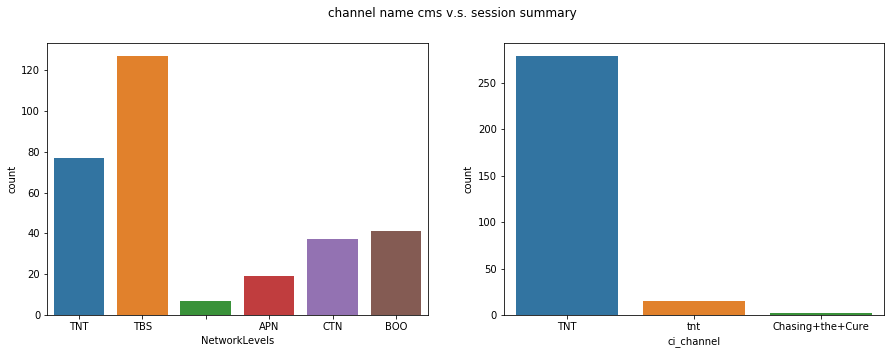

In [27]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
sns.countplot(x="NetworkLevels", data=merge_df, ax=axs[0])
sns.countplot(x="ci_channel", data=merge_df, ax=axs[1])
fig.suptitle("channel name cms v.s. session summary")

## Content Type

In [28]:
100 * merge_df[["TitleType.Name","ci_contentType"]].count() / merge_df[["TitleType.Name","ci_contentType"]].shape[0]

TitleType.Name    100.000000
ci_contentType     96.103896
dtype: float64

Text(0.5,0.98,'content type cms v.s. session summary')

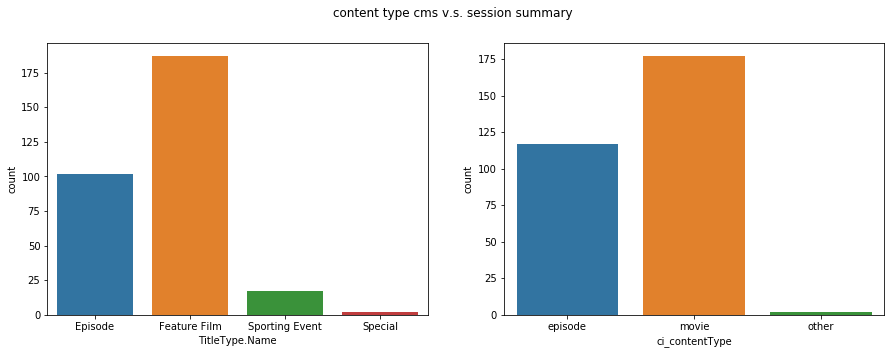

In [29]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
sns.countplot(x="TitleType.Name", data=merge_df, ax=axs[0])
sns.countplot(x="ci_contentType", data=merge_df, ax=axs[1])
fig.suptitle("content type cms v.s. session summary")

## Genres

In [30]:
100 * merge_df[["Genres","ci_genre"]].count() / merge_df[["Genres","ci_genre"]].shape[0]

Genres      100.000000
ci_genre     96.103896
dtype: float64

Text(0.5,0.98,'genres cms v.s. session summary')

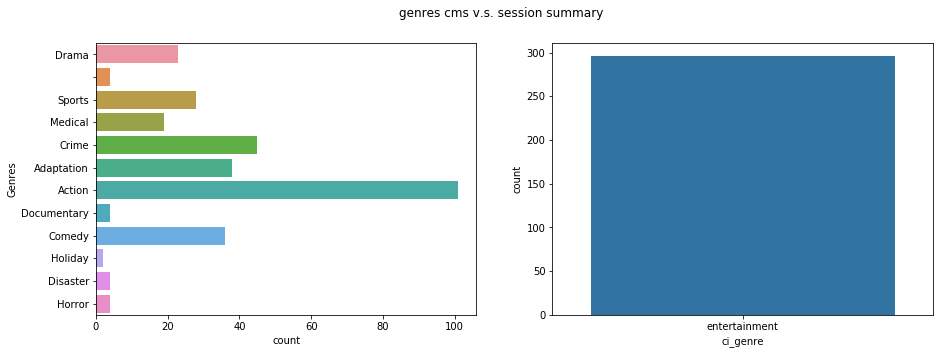

In [31]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
sns.countplot(y="Genres", data=merge_df, ax=axs[0])
sns.countplot(x="ci_genre", data=merge_df, ax=axs[1])
fig.suptitle("genres cms v.s. session summary")

# Conclusion

In Turner-TNT 

* Need to improve 'videoTitleId' coverage rate. Today only 63% sessions pass valid videoTitleId tag.
* Series/Episode name:
   * CMS have good quality series, episode name
   * 57% of assets have more than one asset name in session summary.
   * session summary do not have series name in Live sessions. all asset name are "tnt-west", or "tnt-east".
* Season/Episode number:
   * CMS don't have these infomation, still need to extract patterns from object id.
* Content Length:
   * CMS don't have accurate content length data
* Channels:
   * CMS pass 5 different channels but custom tags is meaningless
* Content Type:
   * Both CMS or custom tags are good to use.
* Genres:
   * Custom tags only contains "entertainment" genre but CMS has 11 different genres

# Action Items

Integrations:
* improve 'videoTitleId' coverage rate in session summary
* understand why many cmsID looks like: ‘tbs-clip-28252’, ‘tbs-clip-27464’, ‘tbs-clip-25106’.. which is not cmsID
* pass correct series/episode name for Live sessions

MDS:
* update mds rules to reduce asset name duplications
* change alias ID to 'videoTitleId'
* work out a plan to ingest CMS Series/Episode name, channels, content type and genres into MDS